<a href="https://colab.research.google.com/github/JA2PYC/ja2pyc_green_python/blob/main/ch14/tensorflowKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Tensorflow and Keras
# Import Data Library
import numpy as np
import pandas as pd

# Import Graph Library
import matplotlib.pyplot as plt
import seaborn as sb

# Import Deep Learning Library
import tensorflow as tf
import keras as kr

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# !mkdir -p /content/drive/MyDrive/Github/
# %cd /content/drive/MyDrive/Github/
# !git clone https://github.com/JA2PYC/ja2pyc_green_python.git

Mounted at /content/drive


In [3]:
# Set Data Frame
# data_df = pd.read_excel('/content/ja2pyc_green_python/ch14/data/사과배-학습.xlsx')
data_df = pd.read_excel('/content/drive/MyDrive/Github/ja2pyc_green_python/ch14/data/사과배-학습.xlsx')
print (data_df.info())

# Fill Nan Data
filled_data = data_df.fillna(0)
print (filled_data.isna().sum())

# Convert Data
converted_data = filled_data.copy()
convert_map = {'사과' : 0, '배' : 1}
converted_data['fruit'] = converted_data['fruit'].map(convert_map)
print (converted_data.info())
data_train = converted_data.iloc[:, 1:]
data_label = converted_data.iloc[:, 0]
print (data_train.info(), data_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fruit     95 non-null     object 
 1   weight    95 non-null     float64
 2   height    95 non-null     float64
 3   width     95 non-null     float64
 4   hardness  95 non-null     float64
 5   sweet     95 non-null     float64
 6   sour      95 non-null     float64
 7   color     61 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.1+ KB
None
fruit       0
weight      0
height      0
width       0
hardness    0
sweet       0
sour        0
color       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fruit     95 non-null     int64  
 1   weight    95 non-null     float64
 2   height    95 non-null     float64
 3   width     95 non-null   

In [12]:
# Sequential Model
tf.random.set_seed(0)
seq_model = kr.models.Sequential()
seq_model.add(kr.layers.Dense(units = 6, input_shape =(7,), activation = 'relu'))
seq_model.add(kr.layers.Dense(units = 3, activation = 'relu'))
seq_model.add(kr.layers.Dense(units = 1, activation = 'sigmoid'))
seq_model

<Sequential name=sequential_3, built=True>

In [13]:
# Compile Model
seq_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
seq_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Training Model
train_history = seq_model.fit(data_train, data_label, epochs=50)
print (train_history)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3899 - loss: 50.7351
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3899 - loss: 47.2674 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3899 - loss: 44.0207 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3899 - loss: 41.0891 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3899 - loss: 38.4240 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3899 - loss: 35.9375 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3899 - loss: 33.5514 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3899 - loss: 31.3190 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3899 - loss: 29.0999 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3899 - loss: 26.8766 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3899 - loss: 24.6547 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3899 - loss:

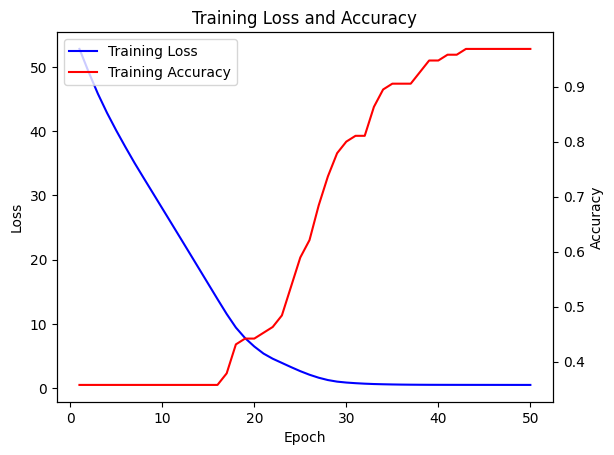

In [15]:
# Training Graph
history_loss = train_history.history['loss']
history_acc = train_history.history['accuracy']
history_epoch = range(1, len(history_loss) + 1)
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history_epoch, history_loss, 'b', label='Training Loss')
ax_lines, ax_labels = plt.gca().get_legend_handles_labels()

ax_twinx = plt.twinx()
ax_twinx.set_ylabel('Accuracy')
plt.plot(history_epoch, history_acc, 'r', label='Training Accuracy')
ax_twinx_lines, ax_twinx_labels = ax_twinx.get_legend_handles_labels()
plt.legend(ax_lines + ax_twinx_lines, ax_labels + ax_twinx_labels)
plt.show()

In [16]:
# Training History
history_epoch = range(1, len(history_loss) + 1)
print (history_loss)
print (len(history_loss))
print(history_epoch)

[52.80881118774414, 49.2096061706543, 45.841251373291016, 42.83930969238281, 40.10304260253906, 37.51901626586914, 35.02259063720703, 32.66090393066406, 30.32137680053711, 27.978382110595703, 25.636165618896484, 23.288490295410156, 20.934059143066406, 18.574785232543945, 16.213171005249023, 13.851006507873535, 11.532489776611328, 9.418753623962402, 7.77815580368042, 6.468782901763916, 5.369115829467773, 4.567218780517578, 3.9110891819000244, 3.2555716037750244, 2.6278140544891357, 2.071237325668335, 1.6055703163146973, 1.2422490119934082, 0.997685968875885, 0.8547019362449646, 0.7559585571289062, 0.6787859201431274, 0.6236298680305481, 0.5868175029754639, 0.5574214458465576, 0.5353341102600098, 0.5206124782562256, 0.5103400349617004, 0.5028034448623657, 0.49922502040863037, 0.4966990053653717, 0.4945676028728485, 0.4929088354110718, 0.491580605506897, 0.4905933439731598, 0.48956406116485596, 0.48847347497940063, 0.4873371422290802, 0.48617058992385864, 0.4850189983844757]
50
range(1, 5

In [19]:
# Set Test Data
test_df = pd.read_excel('/content/drive/MyDrive/Github/ja2pyc_green_python/ch14/data/사과배-테스트.xlsx')
filled_test_data = test_df.fillna(0)
converted_test_data = filled_test_data.copy()
convert_map = {'사과' : 0, '배' : 1}
converted_test_data['fruit'] = converted_test_data['fruit'].map(convert_map)
test_data = converted_test_data.iloc[:, 1:]
test_label = converted_test_data.iloc[:, 0]

In [20]:
predict_result = seq_model.predict(test_data)
print (predict_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[0.99999934]
 [0.9999989 ]
 [0.9984571 ]
 [0.46936557]
 [0.46936557]
 [0.46936557]
 [1.        ]
 [0.6411149 ]]


In [25]:
# Evaluate Model
test_loss_value, test_acc_value = seq_model.evaluate(test_data, test_label)
print (test_loss_value, test_acc_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8750 - loss: 0.3659
0.3659180998802185 0.875
